# Stroke Prediction

# **Importing Libraries** <a id="1"></a>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **Importing Dataset** <a id="2"></a>

In [13]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [14]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,62861,Female,78.0,0,0,Yes,Private,Urban,67.29,24.6,never smoked,1
1,71061,Male,59.0,0,0,Yes,Govt_job,Urban,70.04,31.4,never smoked,0
2,50363,Female,73.0,1,0,Yes,Private,Rural,60.98,29.9,formerly smoked,0
3,21110,Female,43.0,0,0,Yes,Private,Urban,93.30,32.7,never smoked,0
4,7529,Male,67.0,0,0,Yes,Private,Rural,83.16,25.5,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6472,1681,Female,68.0,0,0,No,Private,Urban,82.85,NaN,smokes,0
6473,45485,Female,45.0,0,0,Yes,Self-employed,Urban,92.76,22.3,Unknown,0
6474,65564,Female,48.0,0,0,Yes,Private,Urban,57.43,53.5,formerly smoked,0
6475,22155,Female,39.0,0,0,Yes,Private,Urban,78.24,28.6,Unknown,0


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6477 entries, 0 to 6476
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6477 non-null   int64  
 1   gender             6477 non-null   object 
 2   age                6477 non-null   float64
 3   hypertension       6477 non-null   int64  
 4   heart_disease      6477 non-null   int64  
 5   ever_married       6477 non-null   object 
 6   work_type          6477 non-null   object 
 7   Residence_type     6477 non-null   object 
 8   avg_glucose_level  6477 non-null   float64
 9   bmi                6250 non-null   float64
 10  smoking_status     6477 non-null   object 
 11  stroke             6477 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 607.3+ KB


**There are null values present in 'bmi'.**

In [16]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  227
smoking_status         0
stroke                 0
dtype: int64

In [17]:
dataset.bmi.replace(to_replace=np.nan, value=dataset.bmi.mean(), inplace=True)

**We replaced null values of 'bmi' with mean in that column.**

In [18]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**After checking, as you can see there are no null values present in our column.**

In [19]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000
mean,36445.442952,48.421111,0.087541,0.054655,110.395878,29.137306,0.249498
std,21025.018217,22.811993,0.282647,0.227323,46.766175,7.173731,0.432756
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17492.000000,31.000000,0.000000,0.000000,78.952671,24.600000,0.000000
50%,37029.000000,52.000000,0.000000,0.000000,94.630000,28.700000,0.000000
75%,54371.000000,67.573548,0.000000,0.000000,123.000000,32.700000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [20]:
selected_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
subset_dataset = dataset[selected_columns]

# Tính toán ma trận tương quan
correlation_matrix = subset_dataset.corr()
correlation_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.205861,0.204970,0.245104,0.285235,0.490392
hypertension,0.205861,1.000000,0.108173,0.123111,0.131651,-0.008162
heart_disease,0.204970,0.108173,1.000000,0.204650,0.059526,0.057572
avg_glucose_level,0.245104,0.123111,0.204650,1.000000,0.225397,0.207711
bmi,0.285235,0.131651,0.059526,0.225397,1.000000,0.073463
stroke,0.490392,-0.008162,0.057572,0.207711,0.073463,1.000000


# **Data Visualization** <a id="3"></a>

## **Heat Map Correlation** <a id="3.1"></a>

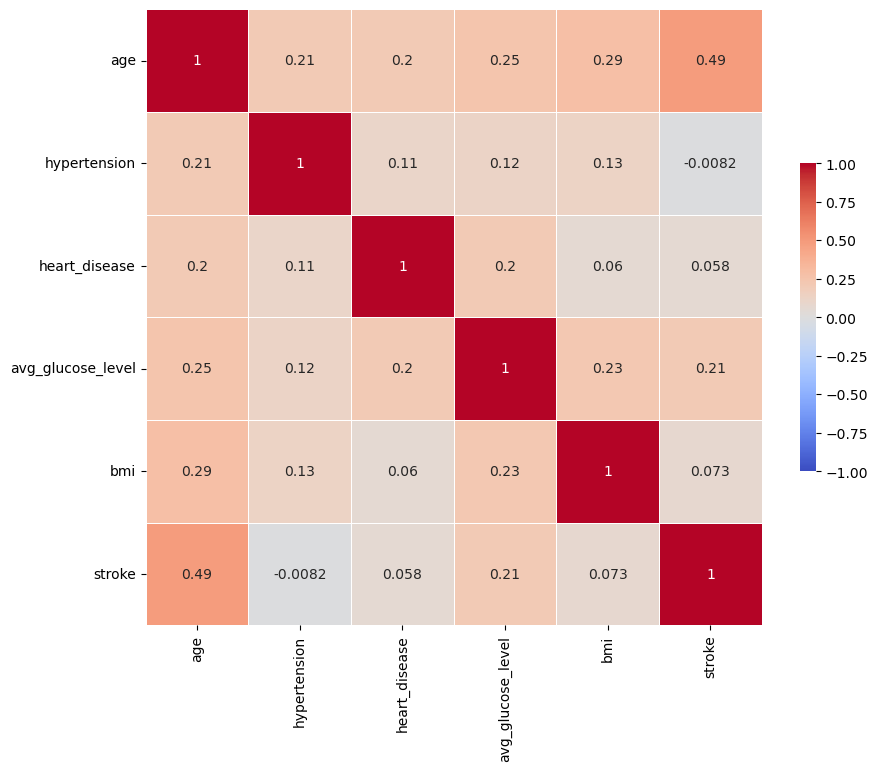

In [22]:
# Bỏ cột 'id'
#subset_dataset = subset_dataset.drop(columns=['id'])

# Tính ma trận tương quan
corr = subset_dataset.corr()

# Thiết lập figure cho matplotlib
plt.figure(figsize=(10, 8))

# Vẽ biểu đồ heatmap với cmap
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Hiển thị biểu đồ
plt.show()

## **Distribution Plot** <a id="3.2"></a>

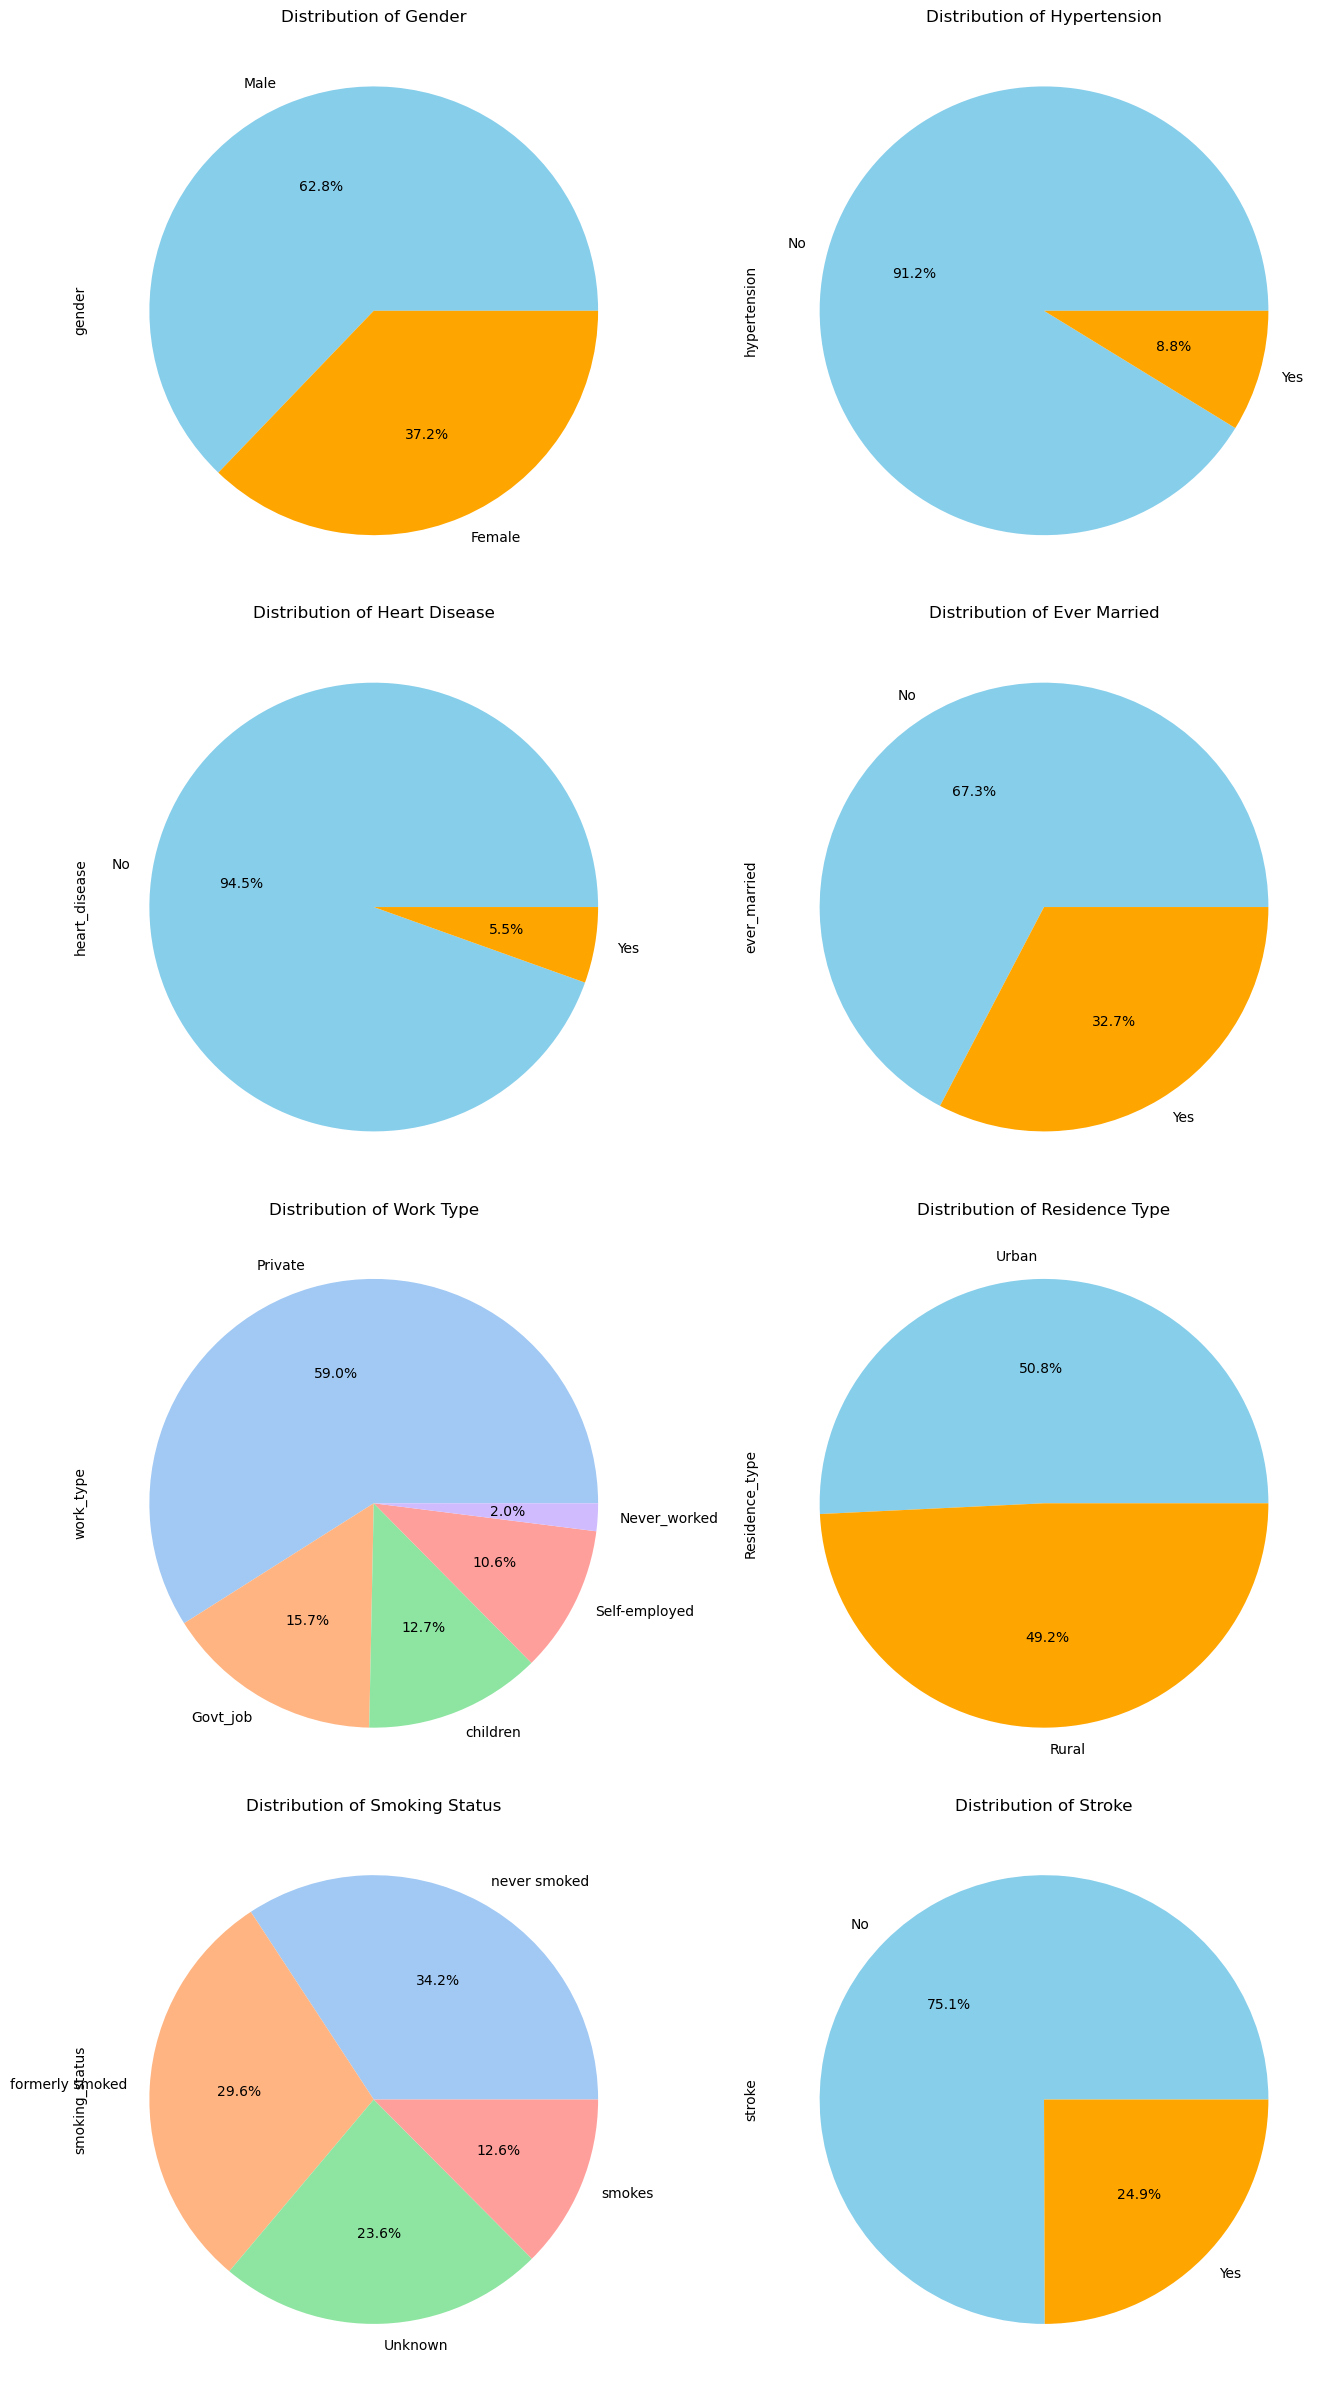

In [25]:
# Vẽ biểu đồ phân phối dạng tròn cho các biến phân loại trong dataset
fig, axes = plt.subplots(4, 2, figsize=(14, 24))

# Distribution of gender
dataset['gender'].value_counts().plot.pie(ax=axes[0, 0], autopct='%1.1f%%', colors=['skyblue', 'orange'], labels=['Male', 'Female'])
axes[0, 0].set_title('Distribution of Gender')

# Distribution of hypertension
dataset['hypertension'].value_counts().plot.pie(ax=axes[0, 1], autopct='%1.1f%%', colors=['skyblue', 'orange'], labels=['No', 'Yes'])
axes[0, 1].set_title('Distribution of Hypertension')

# Distribution of heart disease
dataset['heart_disease'].value_counts().plot.pie(ax=axes[1, 0], autopct='%1.1f%%', colors=['skyblue', 'orange'], labels=['No', 'Yes'])
axes[1, 0].set_title('Distribution of Heart Disease')

# Distribution of ever married
dataset['ever_married'].value_counts().plot.pie(ax=axes[1, 1], autopct='%1.1f%%', colors=['skyblue', 'orange'], labels=['No', 'Yes'])
axes[1, 1].set_title('Distribution of Ever Married')

# Distribution of work type
dataset['work_type'].value_counts().plot.pie(ax=axes[2, 0], autopct='%1.1f%%', labels=dataset['work_type'].unique(), colors=sns.color_palette('pastel', len(dataset['work_type'].unique())))
axes[2, 0].set_title('Distribution of Work Type')

# Distribution of residence type
dataset['Residence_type'].value_counts().plot.pie(ax=axes[2, 1], autopct='%1.1f%%', colors=['skyblue', 'orange'], labels=['Urban', 'Rural'])
axes[2, 1].set_title('Distribution of Residence Type')

# Distribution of smoking status
dataset['smoking_status'].value_counts().plot.pie(ax=axes[3, 0], autopct='%1.1f%%', labels=dataset['smoking_status'].unique(), colors=sns.color_palette('pastel', len(dataset['smoking_status'].unique())))
axes[3, 0].set_title('Distribution of Smoking Status')

# Distribution of stroke
dataset['stroke'].value_counts().plot.pie(ax=axes[3, 1], autopct='%1.1f%%', colors=['skyblue', 'orange'], labels=['No', 'Yes'])
axes[3, 1].set_title('Distribution of Stroke')

plt.tight_layout()
plt.show()

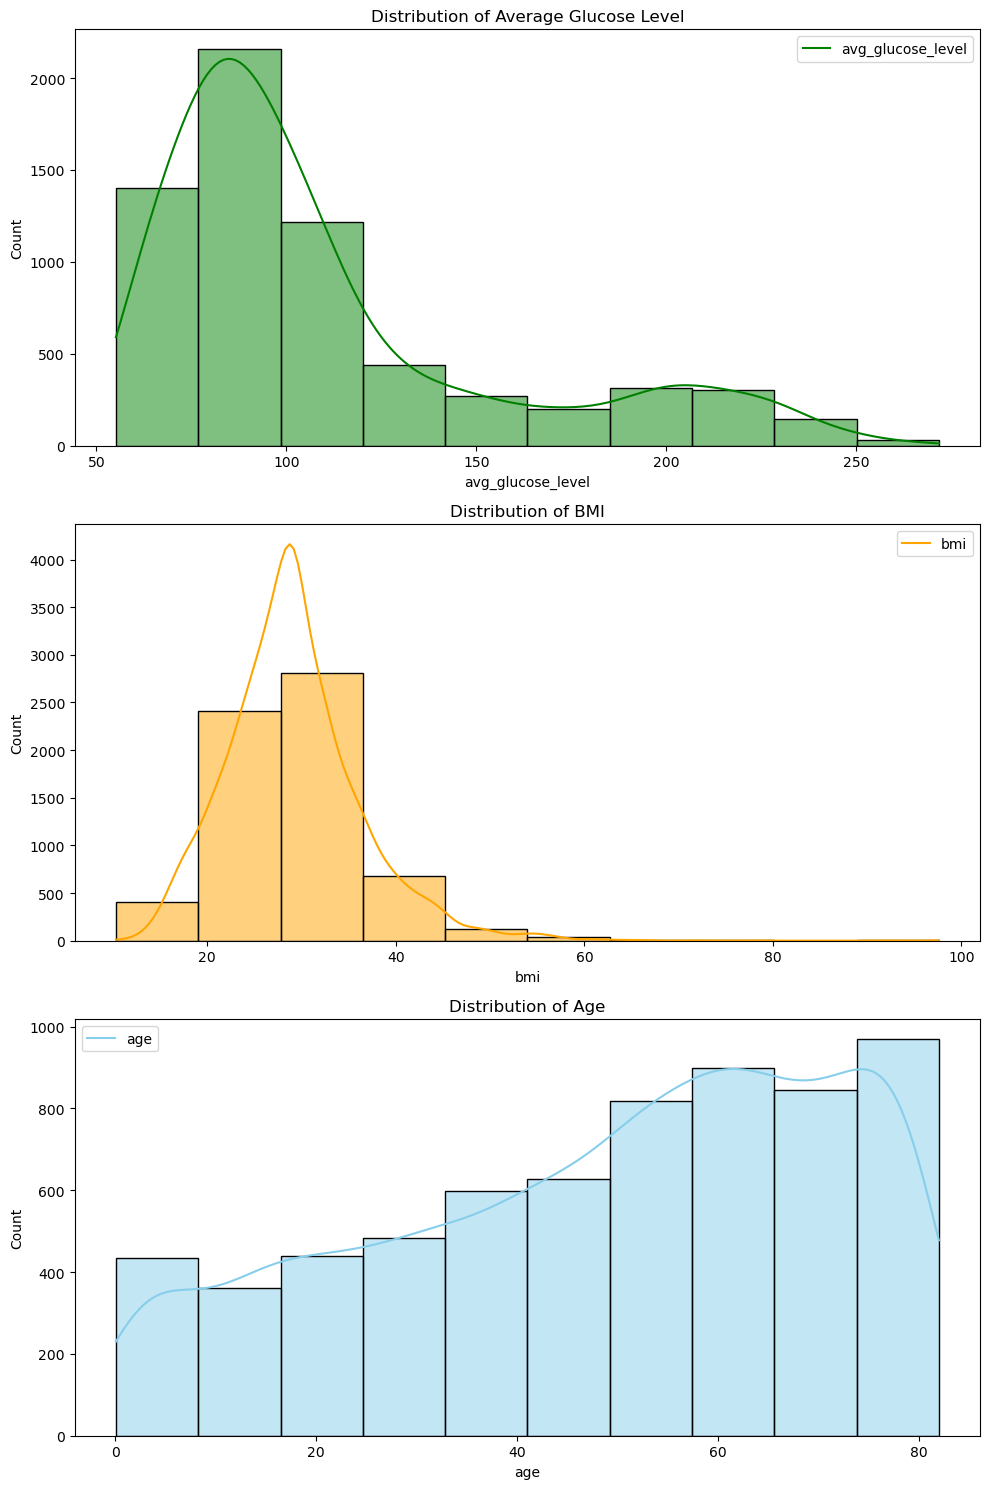

In [27]:
# Vẽ biểu đồ phân phối dạng subplots cho các biến 'avg_glucose_level', 'bmi', và 'age'
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Distribution of avg_glucose_level
sns.histplot(dataset['avg_glucose_level'], kde=True, ax=axes[0], color='green', bins=10)
axes[0].set_title('Distribution of Average Glucose Level')
axes[0].legend(labels=['avg_glucose_level'])

# Distribution of bmi
sns.histplot(dataset['bmi'], kde=True, ax=axes[1], color='orange', bins=10)
axes[1].set_title('Distribution of BMI')
axes[1].legend(labels=['bmi'])

# Distribution of age
sns.histplot(dataset['age'], kde=True, ax=axes[2], color='skyblue', bins=10)
axes[2].set_title('Distribution of Age')
axes[2].legend(labels=['age'])

plt.tight_layout()
plt.show()

### **No Stroke vs Stroke by each feature** <a id="3.3.3"></a>

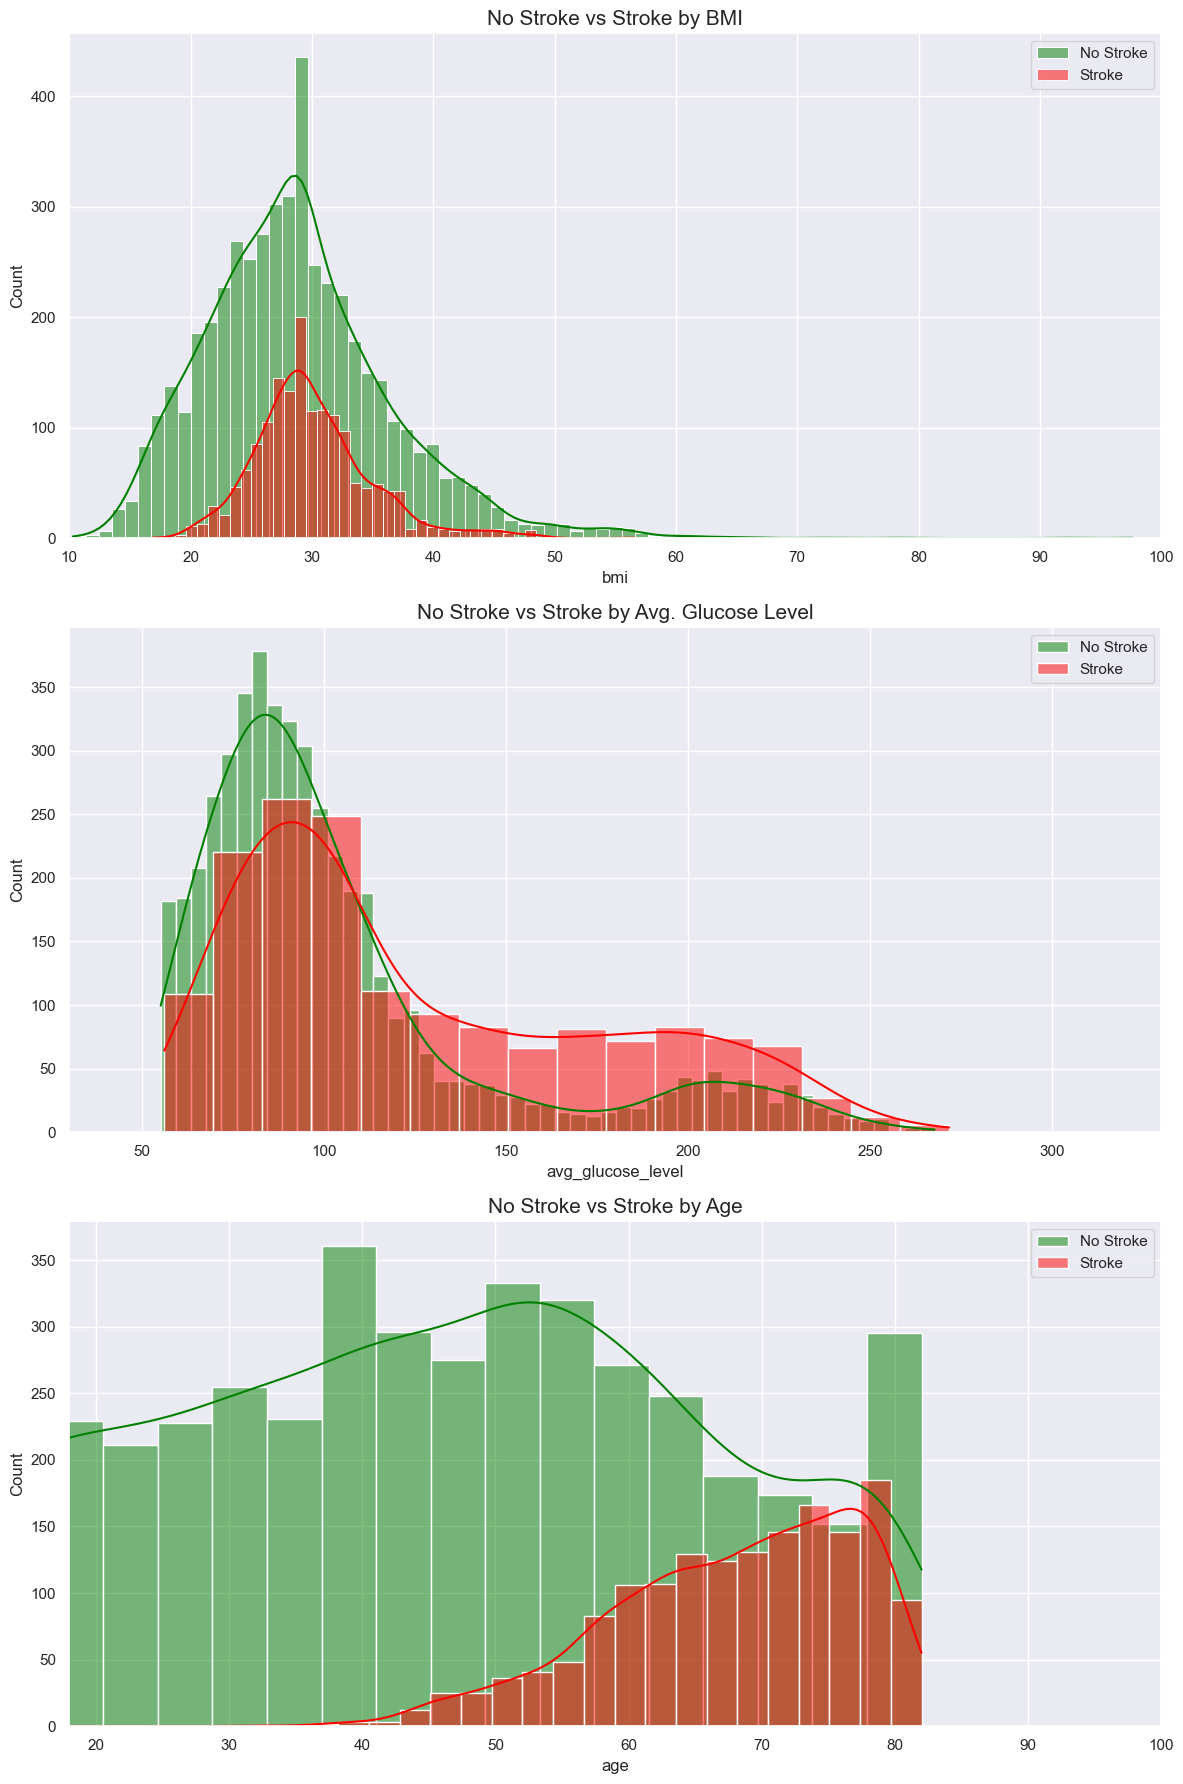

In [30]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Distribution of BMI: No Stroke vs Stroke
sns.histplot(dataset[dataset['stroke'] == 0]["bmi"], color='green', kde=True, ax=axes[0], label='No Stroke')
sns.histplot(dataset[dataset['stroke'] == 1]["bmi"], color='red', kde=True, ax=axes[0], label='Stroke')
axes[0].set_title('No Stroke vs Stroke by BMI', fontsize=15)
axes[0].set_xlim([10, 100])
axes[0].legend()

# Distribution of Avg. Glucose Level: No Stroke vs Stroke
sns.histplot(dataset[dataset['stroke'] == 0]["avg_glucose_level"], color='green', kde=True, ax=axes[1], label='No Stroke')
sns.histplot(dataset[dataset['stroke'] == 1]["avg_glucose_level"], color='red', kde=True, ax=axes[1], label='Stroke')
axes[1].set_title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
axes[1].set_xlim([30, 330])
axes[1].legend()

# Distribution of Age: No Stroke vs Stroke
sns.histplot(dataset[dataset['stroke'] == 0]["age"], color='green', kde=True, ax=axes[2], label='No Stroke')
sns.histplot(dataset[dataset['stroke'] == 1]["age"], color='red', kde=True, ax=axes[2], label='Stroke')
axes[2].set_title('No Stroke vs Stroke by Age', fontsize=15)
axes[2].set_xlim([18, 100])
axes[2].legend()

plt.tight_layout()
plt.show()

## **Violin Plot** <a id="3.5"></a>

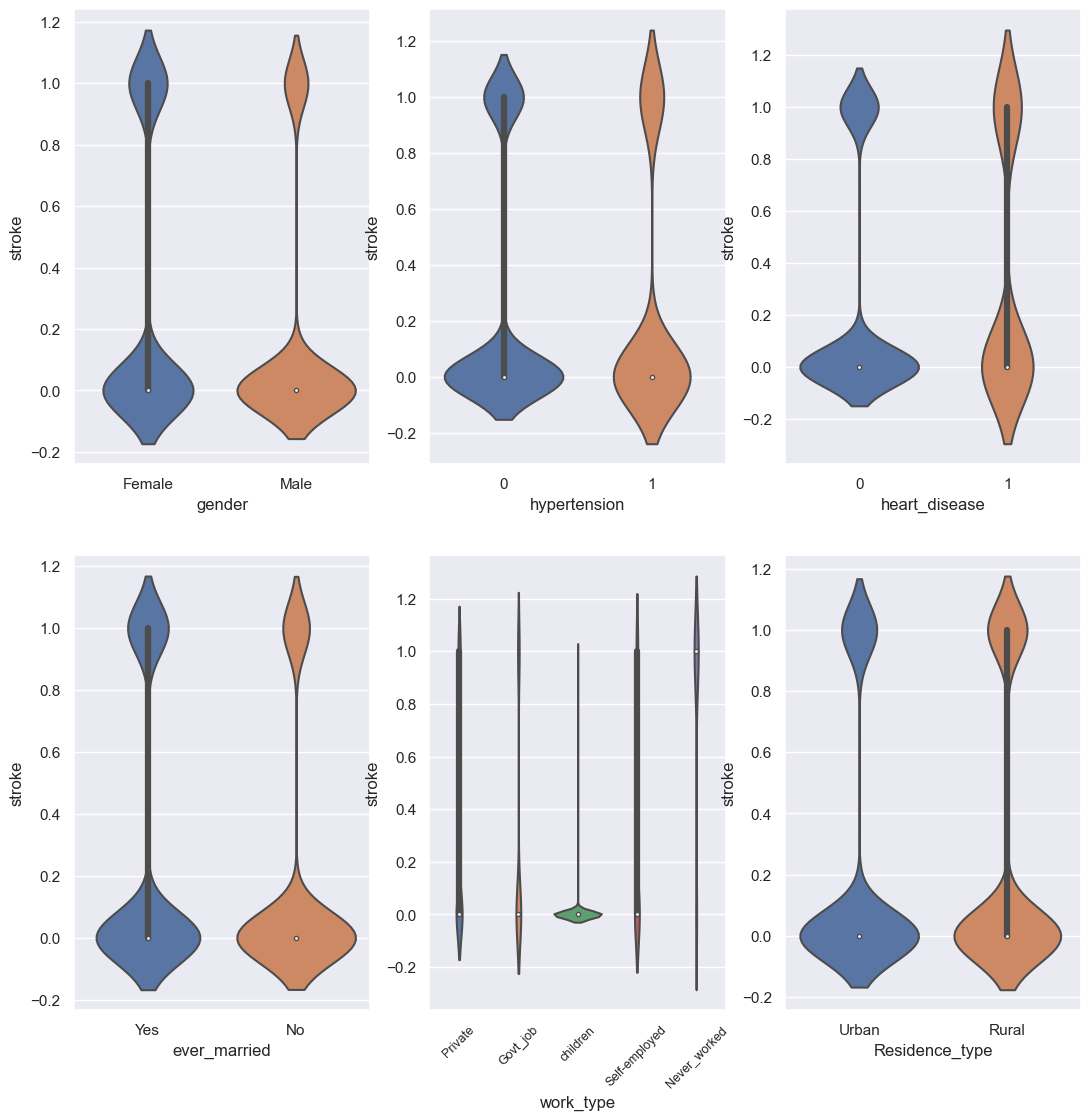

In [28]:
plt.figure(figsize=(13,13))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'gender', y = 'stroke', data = dataset)
plt.subplot(2,3,2)
sns.violinplot(x = 'hypertension', y = 'stroke', data = dataset)
plt.subplot(2,3,3)
sns.violinplot(x = 'heart_disease', y = 'stroke', data = dataset)
plt.subplot(2,3,4)
sns.violinplot(x = 'ever_married', y = 'stroke', data = dataset)
plt.subplot(2,3,5)
sns.violinplot(x = 'work_type', y = 'stroke', data = dataset)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'Residence_type', y = 'stroke', data = dataset)
plt.show()

## **Pair Plot** <a id="3.6"></a>

<Figure size 1000x1000 with 0 Axes>

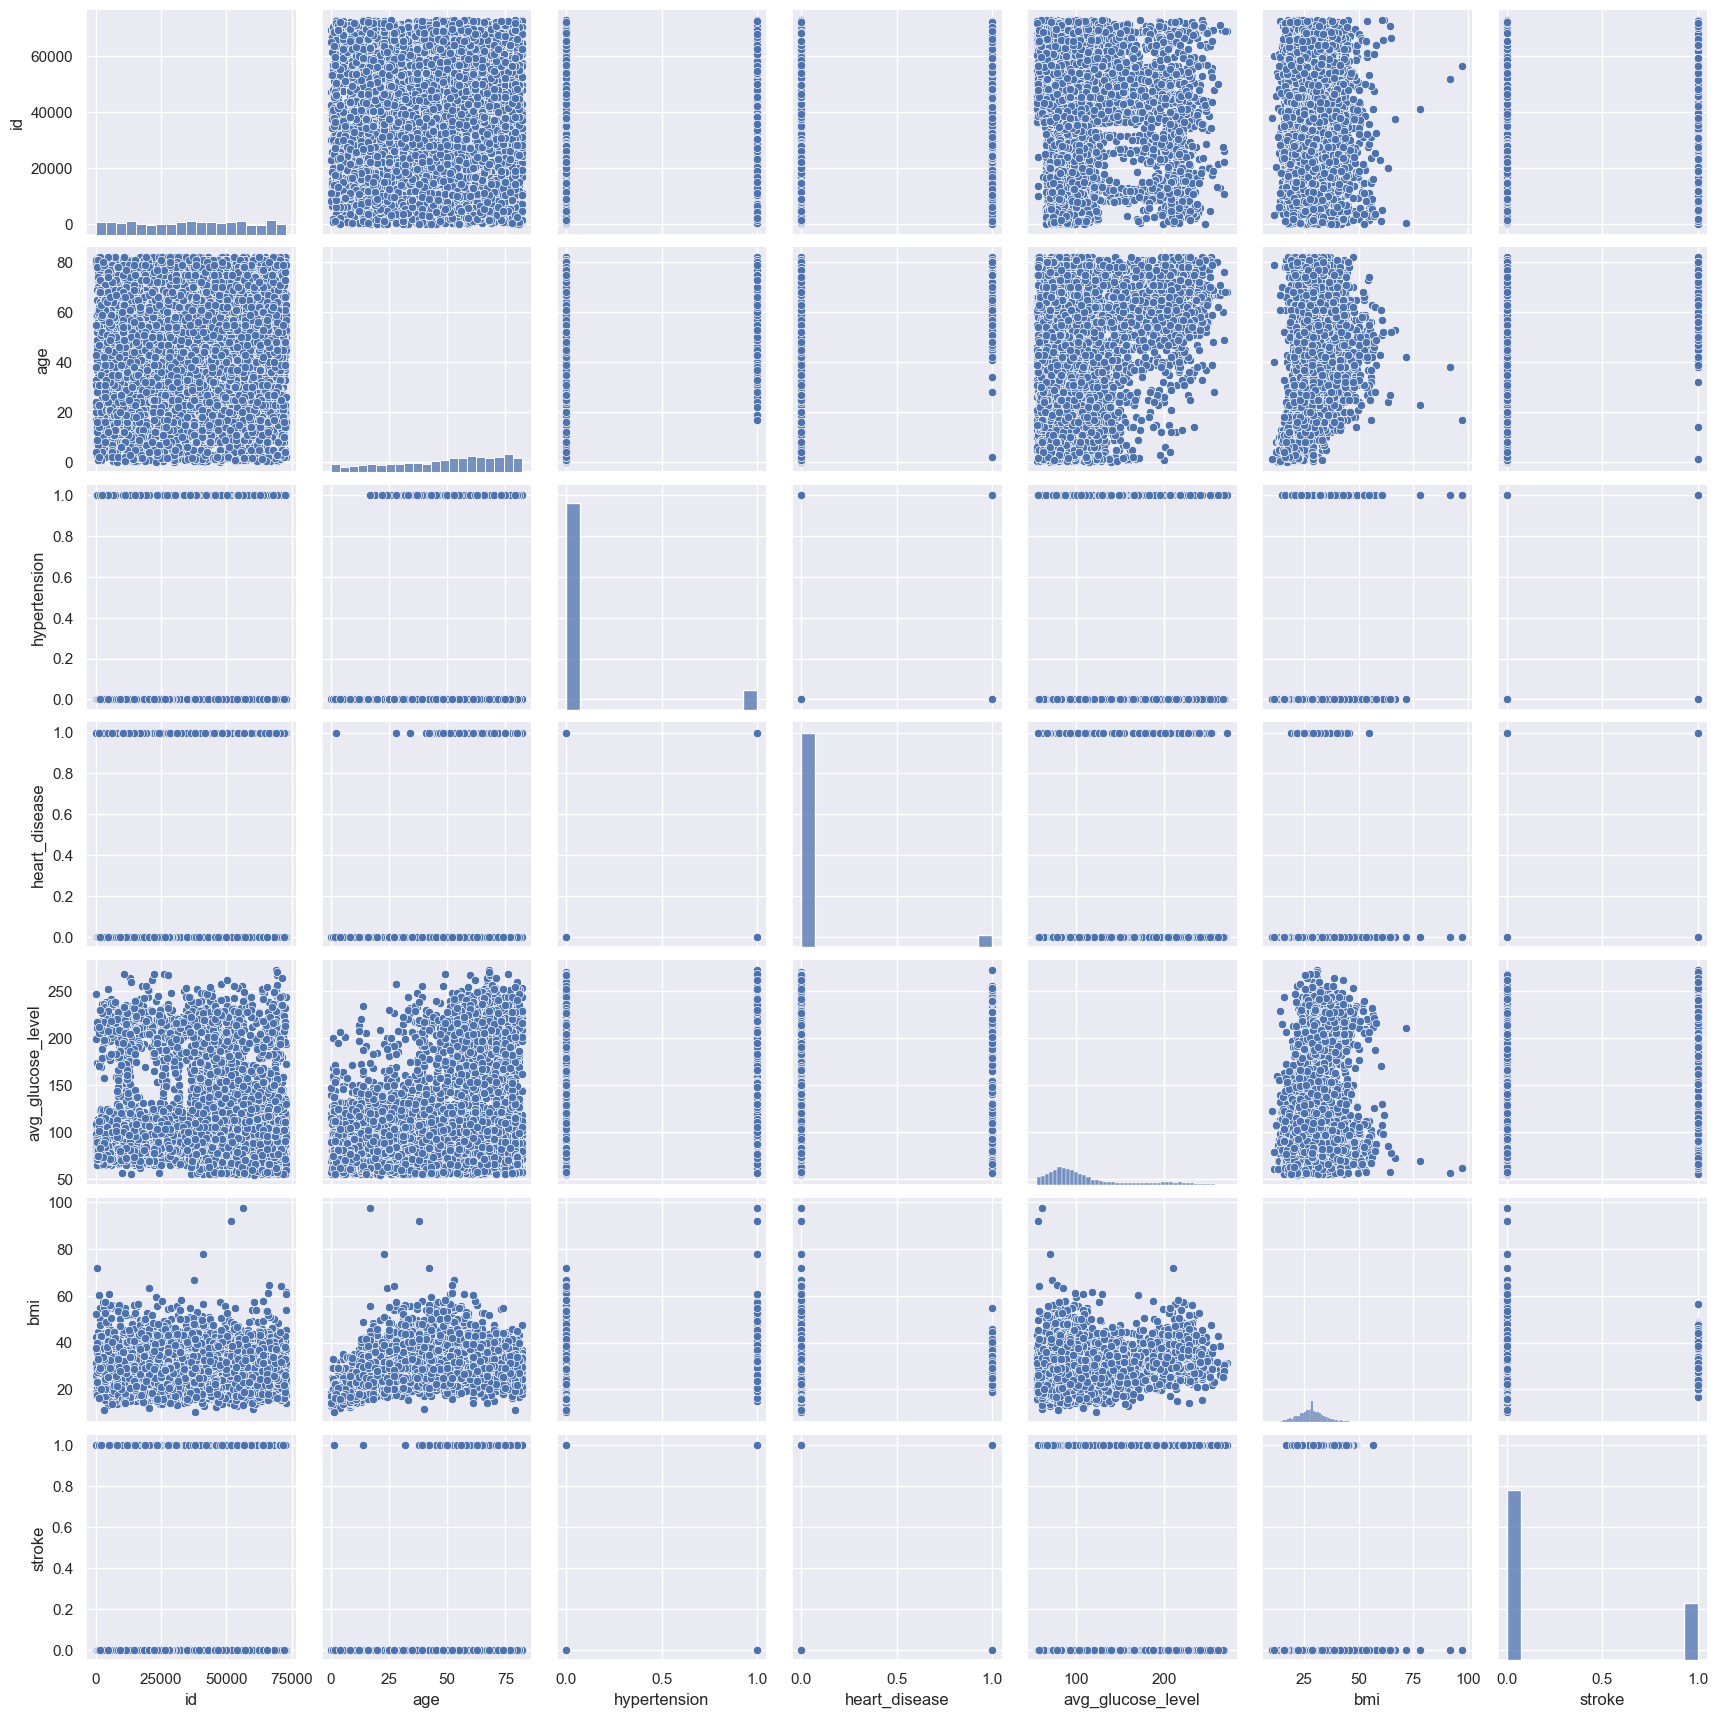

In [579]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(dataset)
plt.show()

# **Data Preprocessing** <a id="4"></a>

**Encoding**

In [580]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,62861,Female,78.0,0,0,Yes,Private,Urban,67.29,24.600000,never smoked,1
1,71061,Male,59.0,0,0,Yes,Govt_job,Urban,70.04,31.400000,never smoked,0
2,50363,Female,73.0,1,0,Yes,Private,Rural,60.98,29.900000,formerly smoked,0
3,21110,Female,43.0,0,0,Yes,Private,Urban,93.30,32.700000,never smoked,0
4,7529,Male,67.0,0,0,Yes,Private,Rural,83.16,25.500000,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6472,1681,Female,68.0,0,0,No,Private,Urban,82.85,29.137306,smokes,0
6473,45485,Female,45.0,0,0,Yes,Self-employed,Urban,92.76,22.300000,Unknown,0
6474,65564,Female,48.0,0,0,Yes,Private,Urban,57.43,53.500000,formerly smoked,0
6475,22155,Female,39.0,0,0,Yes,Private,Urban,78.24,28.600000,Unknown,0


In [581]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# # CASE 0: Binary encoder
# dataset['gender']=dataset['gender'].apply(lambda x : 1 if x=='Male' else 0) 
# dataset["Residence_type"] = dataset["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
# dataset["ever_married"] = dataset["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
# # CASE 1: Use OneHotEncoder() to encode the categorical columns:
# # data_dummies = dataset[['smoking_status','work_type']]
# # data_dummies=pd.get_dummies(data_dummies)
# # dataset.drop(columns=['smoking_status','work_type'],inplace=True)
# # CASE 2: Use LabelEncoder() to encode the categorical columns:
# label_encoder = LabelEncoder()
# dataset['smoking_status'] = label_encoder.fit_transform(dataset['smoking_status'])
# dataset['work_type'] = label_encoder.fit_transform(dataset['work_type'])

In [582]:
dataset2=dataset.copy()
dataset2['gender'] = dataset2['gender'].apply(lambda x: 1 if x == 'Male' else 0)
dataset2["Residence_type"] = dataset2["Residence_type"].apply(lambda x: 1 if x == "Urban" else 0)
dataset2["ever_married"] = dataset2["ever_married"].apply(lambda x: 1 if x == "Yes" else 0)
dataset2['smoking_status'] = dataset2['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
dataset2['work_type'] = dataset2['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})
y2=dataset2['stroke']
dataset2.drop(columns=['id','stroke'],inplace=True)
x2=dataset2.astype(int)

In [583]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# dataset['gender'] = dataset['gender'].apply(lambda x: 1 if x == 'Male' else 0)
# dataset["Residence_type"] = dataset["Residence_type"].apply(lambda x: 1 if x == "Urban" else 0)
dataset["ever_married"] = dataset["ever_married"].apply(lambda x: 1 if x == "Yes" else 0)

# Mã hóa one-hot cho các cột 'smoking_status' và 'work_type'
dataset = pd.get_dummies(dataset, columns=['smoking_status', 'work_type','gender','Residence_type'])

# Lưu lại danh sách các tên trường sau khi mã hóa
feature_names = dataset.columns.tolist()


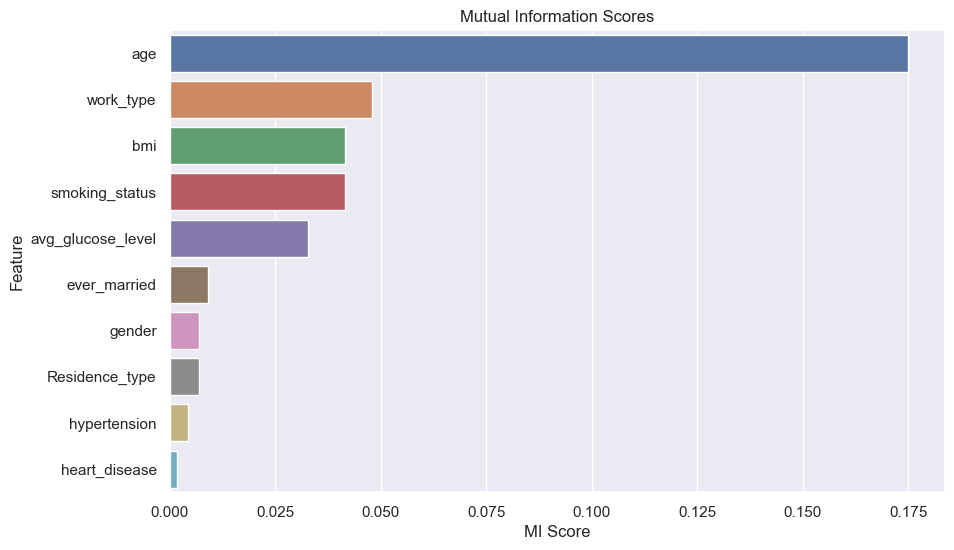

In [584]:
from sklearn.feature_selection import mutual_info_classif
# Tính toán điểm Mutual Information
mi_scores = mutual_info_classif(x2, y2, random_state=0)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=x2.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Vẽ biểu đồ Mutual Information Scores
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_scores, y=mi_scores.index)
plt.title('Mutual Information Scores')
plt.xlabel('MI Score')
plt.ylabel('Feature')
plt.show()

**Train, validation, test set**

In [585]:
y=dataset['stroke']
dataset.drop(columns=['id','stroke'],inplace=True)
x=dataset.astype(int)

from sklearn.model_selection import train_test_split
x_train, x_tmp, y_train, y_tmp = train_test_split(x, y, train_size= 0.7, random_state = 0)
x_val, x_test, y_val, y_test = train_test_split(x_tmp, y_tmp, test_size= 0.5, random_state = 1)

**Handle imblanced data**

In [586]:
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

#adasyn = ADASYN()
#x_train_res, y_train_res = adasyn.fit_resample(x_train, y_train.ravel())

#borderline_smote = BorderlineSMOTE()
#x_train_res, y_train_res = borderline_smote.fit_resample(x_train, y_train.ravel())

**Add noise**

In [587]:
def add_noise(data, noise_level=0.02):
    noisy_data = data.copy()
    for column in ['bmi', 'age', 'glucose']:
        if column in noisy_data.columns:
            noise = np.random.normal(0, noise_level, size=noisy_data[column].shape)
            noisy_data[column] += noise
    return noisy_data

In [588]:
x_train_res = add_noise(x_train_res)

**Normailzation**

In [589]:
x_test_debug=x_test
x_val_debug=x_val

In [590]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train_res = sc.fit_transform(x_train_res)
x_val = sc.transform(x_val)
x_test = sc.transform(x_test)

# Model Selection <a id="9"></a>

In [591]:
!pip install xgboost



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [592]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [593]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [594]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0,kernel='linear')])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_val)
    roc = roc_auc_score(y_val, y_pred)          #ROC AUC Score
    precision = precision_score(y_val, y_pred)  #Precision Score
    recall = recall_score(y_val, y_pred)        #Recall Score
    f1 = f1_score(y_val, y_pred)                #F1 Score
    print(models[m][0],':')
    print('Accuracy Score: ',accuracy_score(y_val, y_pred))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_val, y_pred))*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
Accuracy Score:  0.8415637860082305

ROC AUC Score: 0.82

Precision: 0.65

Recall: 0.77

F1: 0.70
-----------------------------------

SVM :
Accuracy Score:  0.838477366255144

ROC AUC Score: 0.83

Precision: 0.63

Recall: 0.80

F1: 0.71
-----------------------------------

KNeighbors :
Accuracy Score:  0.8713991769547325

ROC AUC Score: 0.85

Precision: 0.71

Recall: 0.80

F1: 0.75
-----------------------------------

GaussianNB :
Accuracy Score:  0.7150205761316872

ROC AUC Score: 0.77

Precision: 0.45

Recall: 0.89

F1: 0.60
-----------------------------------

BernoulliNB :
Accuracy Score:  0.7911522633744856

ROC AUC Score: 0.81

Precision: 0.54

Recall: 0.84

F1: 0.66
-----------------------------------

Decision Tree :
Accuracy Score:  0.8518518518518519

ROC AUC Score: 0.81

Precision: 0.68

Recall: 0.72

F1: 0.70
-----------------------------------

Random Forest :
Accuracy Score:  0.8960905349794238

ROC AUC Score: 0.86

Precision: 0.78

Recall: 0.79

F1

In [595]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [596]:
df.iloc[0]

Model        Logistic Regreesion
Accuracy               84.156379
ROC AUC                 0.815815
Precision               0.645161
Recall                  0.765957
F1                      0.700389
Name: 0, dtype: object

In [597]:
df.iloc[1]

Model              SVM
Accuracy     83.847737
ROC AUC       0.826822
Precision         0.63
Recall        0.804255
F1            0.706542
Name: 1, dtype: object

In [598]:
df.iloc[2]

Model        KNeighbors
Accuracy      87.139918
ROC AUC        0.848532
Precision      0.705224
Recall         0.804255
F1             0.751491
Name: 2, dtype: object

In [599]:
df.iloc[3]

Model        GaussianNB
Accuracy      71.502058
ROC AUC        0.772947
Precision      0.454148
Recall         0.885106
F1             0.600289
Name: 3, dtype: object

In [600]:
df.iloc[4]

Model        BernoulliNB
Accuracy       79.115226
ROC AUC         0.808658
Precision       0.543956
Recall          0.842553
F1              0.661102
Name: 4, dtype: object

In [601]:
df.iloc[5]

Model        Decision Tree
Accuracy         85.185185
ROC AUC           0.808106
Precision         0.682731
Recall            0.723404
F1                0.702479
Name: 5, dtype: object

In [602]:
df.iloc[6]

Model        Random Forest
Accuracy         89.609053
ROC AUC           0.859017
Precision         0.783898
Recall            0.787234
F1                0.785563
Name: 6, dtype: object

In [603]:
df.iloc[7]

Model          XGBoost
Accuracy     88.888889
ROC AUC       0.855718
Precision     0.759184
Recall        0.791489
F1               0.775
Name: 7, dtype: object

In [604]:
df.sort_values(by= ['Recall'], inplace= True, ascending= False)
df

,Model,Accuracy,ROC AUC,Precision,Recall,F1
3,GaussianNB,71.502058,0.772947,0.454148,0.885106,0.600289
4,BernoulliNB,79.115226,0.808658,0.543956,0.842553,0.661102
1,SVM,83.847737,0.826822,0.630000,0.804255,0.706542
2,KNeighbors,87.139918,0.848532,0.705224,0.804255,0.751491
7,XGBoost,88.888889,0.855718,0.759184,0.791489,0.775000
6,Random Forest,89.609053,0.859017,0.783898,0.787234,0.785563
0,Logistic Regreesion,84.156379,0.815815,0.645161,0.765957,0.700389
5,Decision Tree,85.185185,0.808106,0.682731,0.723404,0.702479


# Tuning the Models <a id="10"></a>

In [605]:
from sklearn.model_selection import GridSearchCV

*The **GridSearchCV** is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.*

In [606]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
              (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [607]:
grid_models = [
    (LogisticRegression(), 
     [{'C': [0.25, 0.5, 0.75, 1,2,4,6,8], 'random_state': [0]}]), 
    (KNeighborsClassifier(), 
     [{'n_neighbors': [5, 7, 8, 10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
    (SVC(), 
     [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear', 'rbf'], 'random_state': [0]}]), 
    (GaussianNB(), 
     [{'var_smoothing': [1e-09, 1e-08, 1e-07]}]), 
    (BernoulliNB(), 
     [{'alpha': [0.25, 0.5, 1], 'binarize': [0.0, 0.5, 1.0]}]), 
    (DecisionTreeClassifier(), 
     [{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30], 'random_state': [0]}]), 
    (RandomForestClassifier(), 
     [{'n_estimators': [100, 150, 200], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'random_state': [0]}]), 
    (XGBClassifier(), 
     [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error'], 'max_depth': [3, 5, 7]}])
]

In [608]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'recall',cv = 10)
    grid.fit(x_train_res, y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    y_pred = grid.predict(x_train_res)

    # Tính toán recall trên tập val
    recall = recall_score(y_train_res, y_pred)
    print('{}:\nBest Recall on train set : {:.2f}%'.format(i,recall*100))
    print('Best Parameters : ',best_param)
    print('Recall:',best_accuracy)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Recall on train set : 85.34%
Best Parameters :  {'C': 0.25, 'random_state': 0}
Recall: 0.847507331378299

----------------

KNeighborsClassifier():
Best Recall on train set : 95.87%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 5}
Recall: 0.9319648093841643

----------------

SVC():
Best Recall on train set : 91.70%
Best Parameters :  {'C': 1, 'kernel': 'rbf', 'random_state': 0}
Recall: 0.8950146627565981

----------------

GaussianNB():
Best Recall on train set : 93.52%
Best Parameters :  {'var_smoothing': 1e-09}
Recall: 0.941642228739003

----------------

BernoulliNB():
Best Recall on train set : 86.66%
Best Parameters :  {'alpha': 0.25, 'binarize': 0.0}
Recall: 0.8607038123167154

----------------

DecisionTreeClassifier():
Best Recall on train set : 96.72%
Best Parameters :  {'criterion': 'gini', 'max_depth': 10, 'random_state': 0}
Recall: 0.9287390029325515

----------------

RandomForestClassifier():
Best Recall on train set : 100.00%
Best 

*Looking at output after **GridSearch**, we can determine that the **RandomForest** and **XGBoost** seems best fit for the model.*

# After grid

In [609]:
models = []
models.append(['Logistic Regression', LogisticRegression(C=0.5, random_state=0)])
models.append(['SVM', SVC(C=1, kernel='rbf', random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier(metric='manhattan', n_neighbors=5)])
models.append(['GaussianNB', GaussianNB(var_smoothing=1e-09)])
models.append(['BernoulliNB', BernoulliNB(alpha=0.25, binarize=0.0)])
models.append(['Decision Tree', DecisionTreeClassifier(criterion='gini', max_depth=20, random_state=0)])
models.append(['Random Forest', RandomForestClassifier(criterion='gini', max_features='sqrt', n_estimators=200, random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric='error', learning_rate=0.1, max_depth=7, random_state=0)])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_val)
    roc = roc_auc_score(y_val, y_pred)          #ROC AUC Score
    precision = precision_score(y_val, y_pred)  #Precision Score
    recall = recall_score(y_val, y_pred)        #Recall Score
    f1 = f1_score(y_val, y_pred)                #F1 Score
    print(models[m][0],':')
    print('Accuracy Score: ',accuracy_score(y_val, y_pred))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_val, y_pred))*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regression :
Accuracy Score:  0.8415637860082305

ROC AUC Score: 0.82

Precision: 0.65

Recall: 0.77

F1: 0.70
-----------------------------------

SVM :
Accuracy Score:  0.8724279835390947

ROC AUC Score: 0.85

Precision: 0.71

Recall: 0.80

F1: 0.75
-----------------------------------

KNeighbors :
Accuracy Score:  0.8693415637860082

ROC AUC Score: 0.85

Precision: 0.70

Recall: 0.81

F1: 0.75
-----------------------------------

GaussianNB :
Accuracy Score:  0.7150205761316872

ROC AUC Score: 0.77

Precision: 0.45

Recall: 0.89

F1: 0.60
-----------------------------------

BernoulliNB :
Accuracy Score:  0.7911522633744856

ROC AUC Score: 0.81

Precision: 0.54

Recall: 0.84

F1: 0.66
-----------------------------------

Decision Tree :
Accuracy Score:  0.8518518518518519

ROC AUC Score: 0.81

Precision: 0.68

Recall: 0.72

F1: 0.70
-----------------------------------

Random Forest :
Accuracy Score:  0.9012345679012346

ROC AUC Score: 0.87

Precision: 0.80

Recall: 0.80

F

In [610]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [611]:
df.iloc[0]

Model        Logistic Regression
Accuracy               84.156379
ROC AUC                 0.815815
Precision               0.645161
Recall                  0.765957
F1                      0.700389
Name: 0, dtype: object

In [612]:
df.iloc[1]

Model              SVM
Accuracy     87.242798
ROC AUC       0.846312
Precision     0.711027
Recall        0.795745
F1            0.751004
Name: 1, dtype: object

In [613]:
df.iloc[2]

Model        KNeighbors
Accuracy      86.934156
ROC AUC        0.848624
Precision      0.698529
Recall         0.808511
F1             0.749507
Name: 2, dtype: object

In [614]:
df.iloc[3]

Model        GaussianNB
Accuracy      71.502058
ROC AUC        0.772947
Precision      0.454148
Recall         0.885106
F1             0.600289
Name: 3, dtype: object

In [615]:
df.iloc[4]

Model        BernoulliNB
Accuracy       79.115226
ROC AUC         0.808658
Precision       0.543956
Recall          0.842553
F1              0.661102
Name: 4, dtype: object

In [616]:
df.iloc[5]

Model        Decision Tree
Accuracy         85.185185
ROC AUC           0.806657
Precision         0.684211
Recall            0.719149
F1                0.701245
Name: 5, dtype: object

In [617]:
df.iloc[6]

Model        Random Forest
Accuracy         90.123457
ROC AUC           0.865308
Precision         0.795745
Recall            0.795745
F1                0.795745
Name: 6, dtype: object

In [618]:
df.iloc[7]

Model          XGBoost
Accuracy     88.888889
ROC AUC       0.862964
Precision      0.74902
Recall        0.812766
F1            0.779592
Name: 7, dtype: object

In [619]:
df.sort_values(by= ['Recall'], inplace= True, ascending= False)
df

,Model,Accuracy,ROC AUC,Precision,Recall,F1
3,GaussianNB,71.502058,0.772947,0.454148,0.885106,0.600289
4,BernoulliNB,79.115226,0.808658,0.543956,0.842553,0.661102
7,XGBoost,88.888889,0.862964,0.749020,0.812766,0.779592
2,KNeighbors,86.934156,0.848624,0.698529,0.808511,0.749507
1,SVM,87.242798,0.846312,0.711027,0.795745,0.751004
6,Random Forest,90.123457,0.865308,0.795745,0.795745,0.795745
0,Logistic Regression,84.156379,0.815815,0.645161,0.765957,0.700389
5,Decision Tree,85.185185,0.806657,0.684211,0.719149,0.701245


# Models after Tuning Hyperparameters <a id="11"></a>

*We only see **RandomForest** and **XGBoost** performance as they have high accuracy.*

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       714
           1       0.74      0.79      0.77       258

    accuracy                           0.87       972
   macro avg       0.83      0.85      0.84       972
weighted avg       0.88      0.87      0.87       972

Accuracy: 0.8724
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       737
           1       0.72      0.80      0.75       235

    accuracy                           0.87       972
   macro avg       0.82      0.85      0.83       972
weighted avg       0.88      0.87      0.88       972

Accuracy: 0.8745
ROC AUC score: 0.9179097995787462
Accuracy Score:  0.8724279835390947


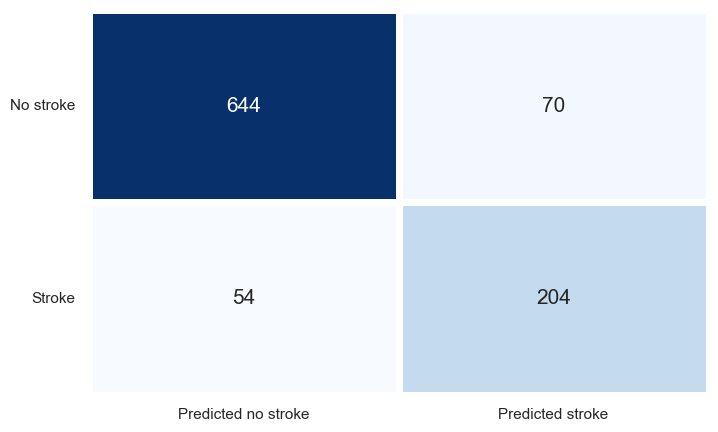

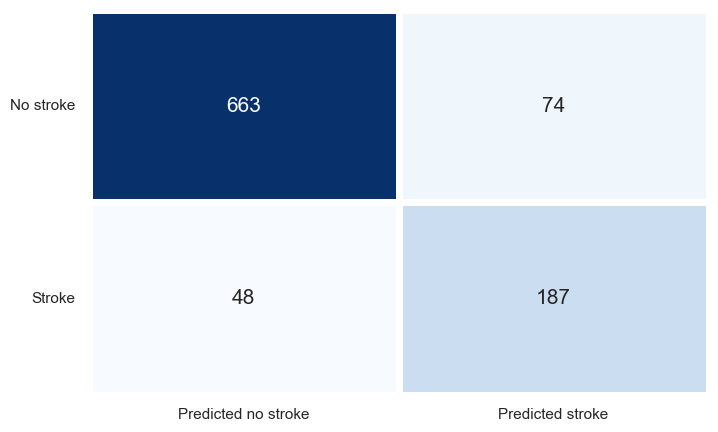

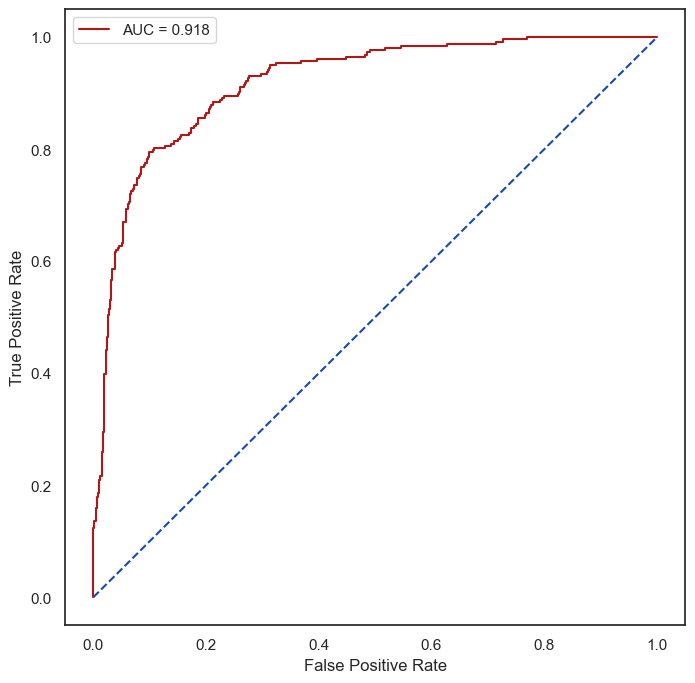

In [633]:
#Fitting RandomForest Model
classifier = SVC(C= 1, kernel='rbf', random_state= 0,probability=True)
classifier.fit(x_train_res, y_train_res)
#y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
threshold = 0.5
y_pred = np.where(y_prob >= threshold, 1, 0)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')



y_prob2 = classifier.predict_proba(x_val)[:,1]
threshold = 0.5
y_pred2 = np.where(y_prob2 >= threshold, 1, 0)
cm2 = confusion_matrix(y_val, y_pred2)
print(classification_report(y_val, y_pred2))
# Tính độ chính xác
accuracy = accuracy_score(y_val, y_pred2)
print(f'Accuracy: {accuracy:.4f}')



print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()
plt.figure(figsize = (8, 5))
sns.heatmap(cm2, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [621]:
thresholds = [ 0.2,0.3, 0.4, 0.5]
for threshold in thresholds:
    y_pred2 = np.where(y_prob2 >= threshold, 1, 0)
    print(f"Threshold: {threshold}")
    print(classification_report(y_val, y_pred2))
    print()

Threshold: 0.2
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       737
           1       0.59      0.89      0.71       235

    accuracy                           0.82       972
   macro avg       0.77      0.85      0.79       972
weighted avg       0.87      0.82      0.83       972


Threshold: 0.3
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       737
           1       0.65      0.86      0.74       235

    accuracy                           0.85       972
   macro avg       0.80      0.86      0.82       972
weighted avg       0.88      0.85      0.86       972


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       737
           1       0.68      0.83      0.75       235

    accuracy                           0.86       972
   macro avg       0.81      0.85      0.83       972
weighted avg       0.88    

In [622]:
from sklearn.inspection import permutation_importance

# Giả sử bạn đã huấn luyện SVC
classifier = SVC()
classifier.fit(x_train, y_train)

# Tính toán permutation importance
result = permutation_importance(classifier, x_train, y_train, n_repeats=10, random_state=0)

# Lấy thông tin về tầm quan trọng của các đặc trưng
feature_importances = result.importances_mean
features = x_train.columns

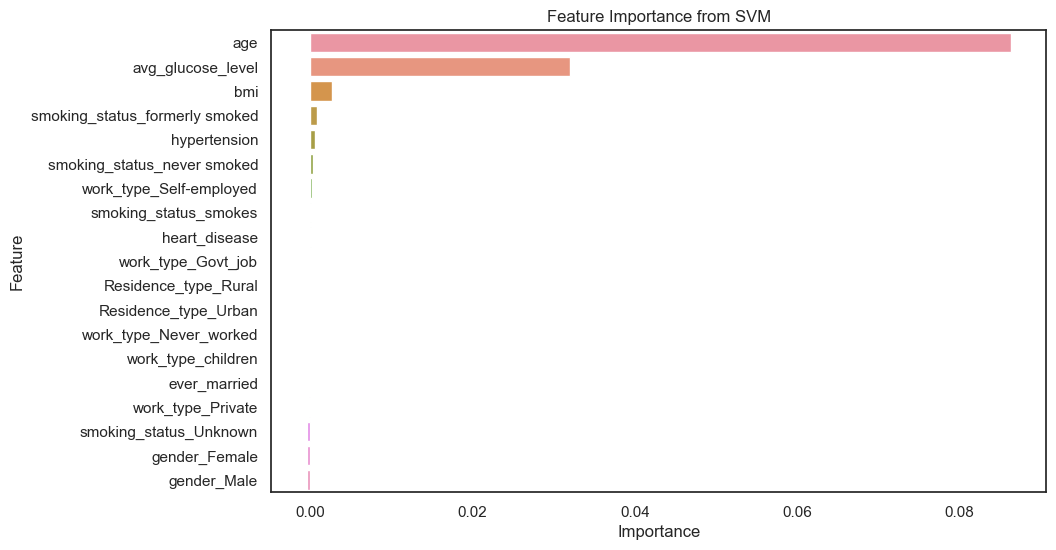

In [623]:
# Tạo DataFrame chứa feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
# Sắp xếp theo thứ tự giảm dần của importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from SVM')
plt.show()

## RandomForest <a id="11.1"></a>

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       714
           1       0.80      0.82      0.81       258

    accuracy                           0.90       972
   macro avg       0.87      0.87      0.87       972
weighted avg       0.90      0.90      0.90       972

Accuracy: 0.8981
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       737
           1       0.77      0.80      0.79       235

    accuracy                           0.90       972
   macro avg       0.86      0.86      0.86       972
weighted avg       0.90      0.90      0.90       972

Accuracy: 0.8961
ROC AUC score: 0.9494169760927627
Accuracy Score:  0.8981481481481481


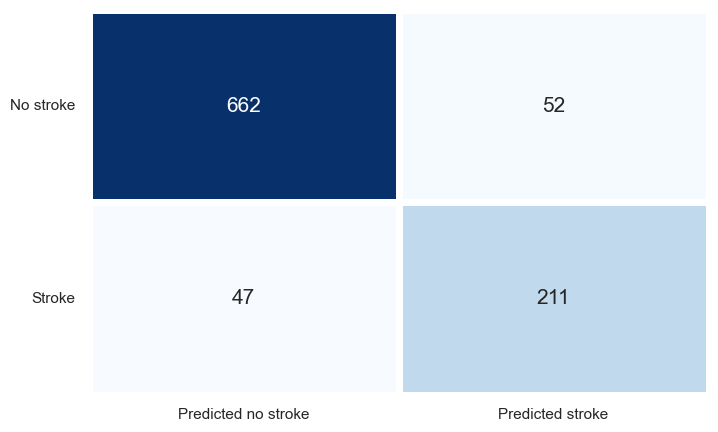

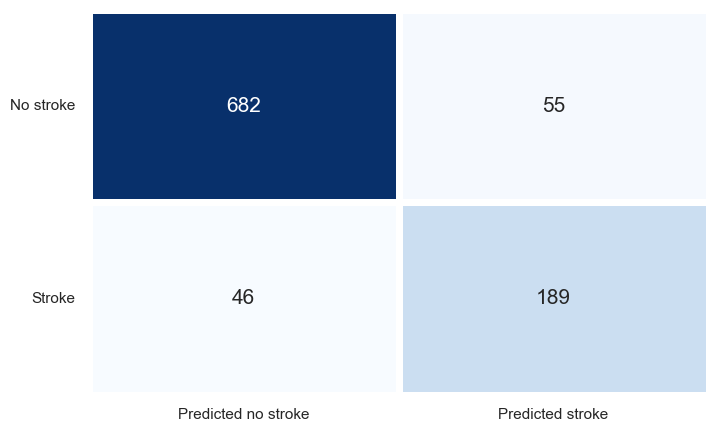

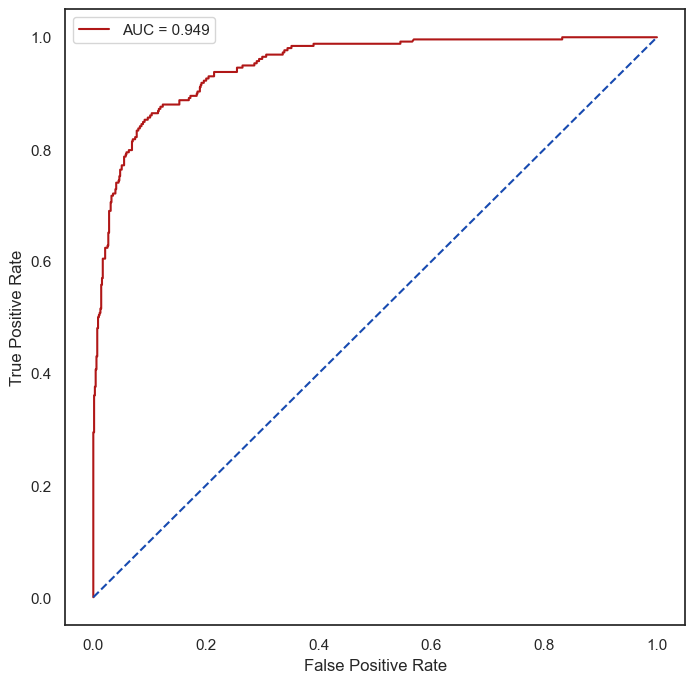

In [634]:
#Fitting RandomForest Model
classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 500, random_state= 0,max_depth=15,max_features='sqrt')
classifier.fit(x_train_res, y_train_res)
#y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
threshold = 0.5
y_pred = np.where(y_prob >= threshold, 1, 0)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')



y_prob2 = classifier.predict_proba(x_val)[:,1]
threshold = 0.5
y_pred2 = np.where(y_prob2 >= threshold, 1, 0)
cm2 = confusion_matrix(y_val, y_pred2)
print(classification_report(y_val, y_pred2))
accuracy = accuracy_score(y_val, y_pred2)
print(f'Accuracy: {accuracy:.4f}')



print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()
plt.figure(figsize = (8, 5))
sns.heatmap(cm2, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [625]:
thresholds = [ 0.2,0.3, 0.4, 0.5]
for threshold in thresholds:
    y_pred2 = np.where(y_prob2 >= threshold, 1, 0)
    print(f"Threshold: {threshold}")
    print(classification_report(y_val, y_pred2))
    print()

Threshold: 0.2
              precision    recall  f1-score   support

           0       0.97      0.75      0.85       737
           1       0.55      0.93      0.69       235

    accuracy                           0.80       972
   macro avg       0.76      0.84      0.77       972
weighted avg       0.87      0.80      0.81       972


Threshold: 0.3
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       737
           1       0.63      0.90      0.74       235

    accuracy                           0.85       972
   macro avg       0.80      0.87      0.82       972
weighted avg       0.88      0.85      0.86       972


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       737
           1       0.71      0.86      0.78       235

    accuracy                           0.88       972
   macro avg       0.83      0.87      0.85       972
weighted avg       0.89    

In [626]:
# Lấy các chỉ số của các trường hợp FP và FN
false_positives = x_val_debug[(y_val == 0) & (y_pred2 == 1)]
false_negatives = x_val_debug[(y_val == 1) & (y_pred2 == 0)]

# Xem thông tin của các trường hợp FP và FN
print("False Positives:\n", false_positives)
print("False Negatives:\n", false_negatives)

False Positives:
       age  hypertension  heart_disease  ever_married  avg_glucose_level  bmi  \
5254   71             0              0             1                198   27   
148    57             0              0             0                107   28   
3402   65             0              0             1                104   27   
4203   58             0              0             1                 96   33   
247    59             0              0             1                223   29   
3188   54             0              0             1                 94   28   
6396   80             0              0             1                 75   29   
6155   51             0              0             1                143   44   
4785   68             0              0             1                116   26   
4514   60             0              1             1                208   35   
1529   61             0              0             1                 72   26   
2976   69             

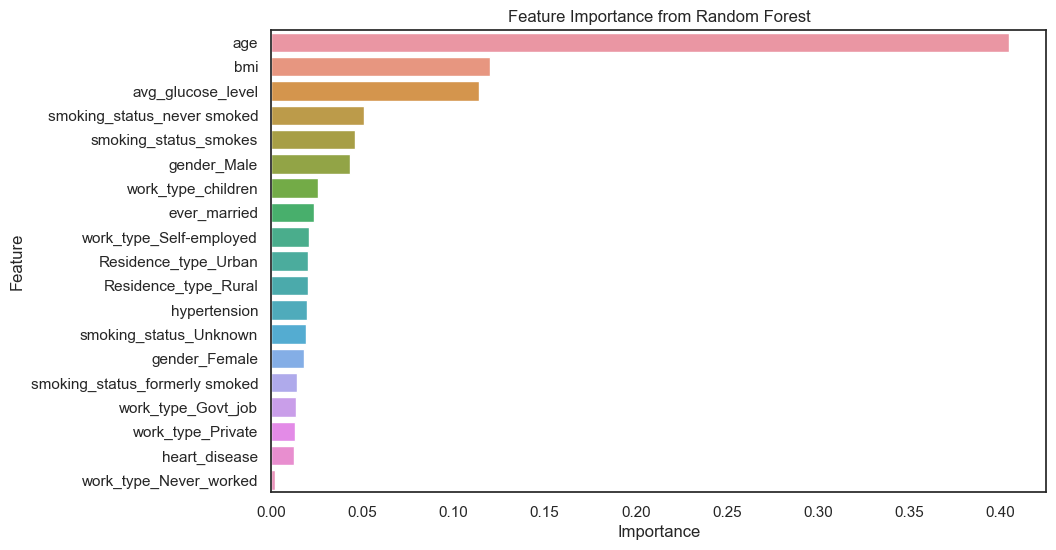

In [627]:
feature_importances = classifier.feature_importances_
features = x_train.columns

# Tạo DataFrame chứa feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sắp xếp theo thứ tự giảm dần của importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

## XGBoost <a id="11.2"></a>

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       714
           1       0.77      0.82      0.79       258

    accuracy                           0.89       972
   macro avg       0.85      0.87      0.86       972
weighted avg       0.89      0.89      0.89       972

Accuracy: 0.8858
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       737
           1       0.75      0.81      0.78       235

    accuracy                           0.89       972
   macro avg       0.84      0.86      0.85       972
weighted avg       0.89      0.89      0.89       972

Accuracy: 0.8889
ROC AUC score: 0.9412063274922372
Accuracy Score:  0.8858024691358025


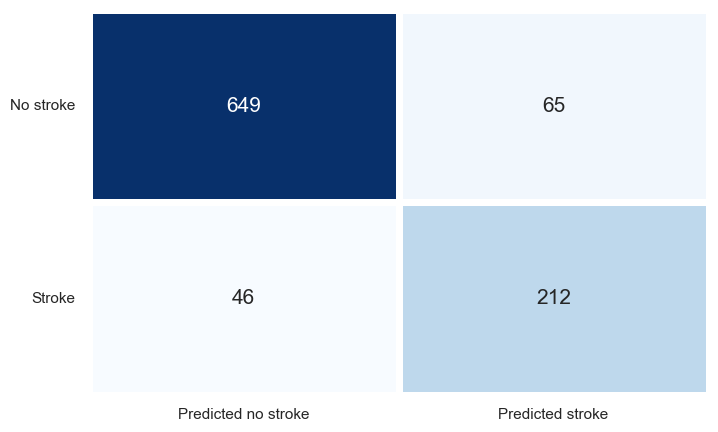

Text(0.5, 0, 'False Positive Rate')

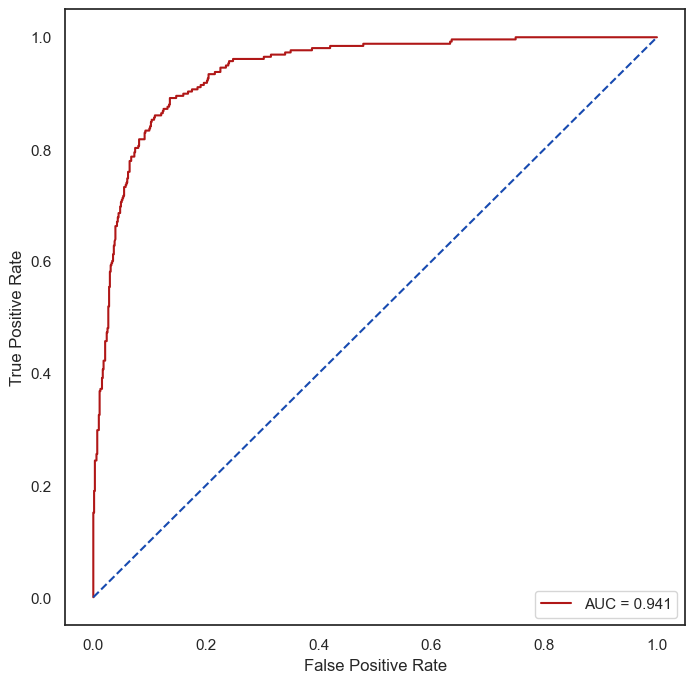

In [635]:
#Fitting XGBClassifier Model
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1,max_depth=7)
classifier.fit(x_train_res, y_train_res)
# y_pred = classifier.predict(x_test)
# y_prob = classifier.predict_proba(x_test)[:,1]
# cm = confusion_matrix(y_test, y_pred)
y_prob = classifier.predict_proba(x_test)[:,1]
threshold = 0.5
y_pred = np.where(y_prob >= threshold, 1, 0)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


y_prob2 = classifier.predict_proba(x_val)[:,1]
threshold = 0.5
y_pred2 = np.where(y_prob2 >= threshold, 1, 0)
cm2 = confusion_matrix(y_val, y_pred2)
print(classification_report(y_val, y_pred2))
accuracy = accuracy_score(y_val, y_pred2)
print(f'Accuracy: {accuracy:.4f}')



print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [629]:
# Lấy các chỉ số của các trường hợp FP và FN
false_positives = x_val_debug[(y_val == 0) & (y_pred2 == 1)]
false_negatives = x_val_debug[(y_val == 1) & (y_pred2 == 0)]

# Xem thông tin của các trường hợp FP và FN
print("False Positives:\n", false_positives)
print("False Negatives:\n", false_negatives)

False Positives:
       age  hypertension  heart_disease  ever_married  avg_glucose_level  bmi  \
5254   71             0              0             1                198   27   
148    57             0              0             0                107   28   
3402   65             0              0             1                104   27   
3188   54             0              0             1                 94   28   
6396   80             0              0             1                 75   29   
...   ...           ...            ...           ...                ...  ...   
939    59             0              0             0                 74   28   
6291   60             0              0             1                185   39   
3099   79             0              0             1                 97   31   
5759   58             0              0             1                196   37   
2984   70             1              0             1                154   28   

      smoking_status_

In [630]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
for threshold in thresholds:
    y_pred2 = np.where(y_prob2 >= threshold, 1, 0)
    print(f"Threshold: {threshold}")
    print(classification_report(y_val, y_pred2))
    print()

Threshold: 0.1
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       737
           1       0.52      0.97      0.68       235

    accuracy                           0.78       972
   macro avg       0.75      0.84      0.75       972
weighted avg       0.87      0.78      0.79       972


Threshold: 0.2
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       737
           1       0.60      0.92      0.73       235

    accuracy                           0.84       972
   macro avg       0.79      0.87      0.81       972
weighted avg       0.88      0.84      0.85       972


Threshold: 0.3
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       737
           1       0.65      0.87      0.75       235

    accuracy                           0.86       972
   macro avg       0.80      0.86      0.82       972
weighted avg       0.88    

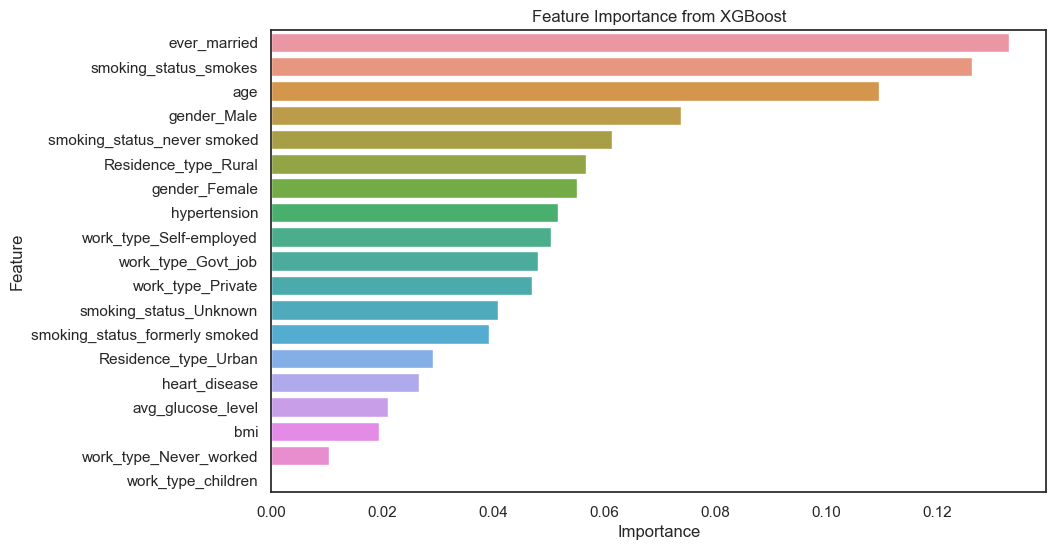

In [631]:
feature_importances = classifier.feature_importances_
features = x_train.columns

# Tạo DataFrame chứa feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sắp xếp theo thứ tự giảm dần của importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from XGBoost')
plt.show()

In [632]:
error_df = x_test.copy()
error_df['true_label'] = y_test
error_df['predicted_label'] = y_pred
error_df['error'] = error_df['true_label'] != error_df['predicted_label']

sns.pairplot(error_df, hue='error', palette={False: "blue", True: "red"})
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
x_test = pd.DataFrame(x_test, columns=['age', 'bmi', '...'])  # Thêm tên các cột tương ứng

# Chuyển y_test và y_pred thành Series của pandas
y_test = pd.Series(y_test, name='true_label')
y_pred = pd.Series(y_pred, name='predicted_label')

# Thêm cột lỗi vào DataFrame
x_test['true_label'] = y_test.values
x_test['predicted_label'] = y_pred.values
x_test['error'] = x_test['true_label'] != x_test['predicted_label']

# Vẽ biểu đồ phân phối đặc điểm 'bmi'
sns.histplot(data=x_test, x='bmi', hue='error', multiple='dodge')
plt.title("Distribution of 'bmi' for Correct and Incorrect Predictions")
plt.show()

ValueError: Shape of passed values is (1022, 21), indices imply (1022, 3)